
#    Name: Krish Sukhani
#    UID: 2018140059
#    Batch: D
#    Branch: IT
# Topic:- Fuzzy Controller - Train Problem

In [1]:
pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### **Set Inputs and Output and define the range**

In [3]:
distance = ctrl.Antecedent(np.arange(0, 301, 1), 'distance')
speed = ctrl.Antecedent(np.arange(0, 61, 1), 'speed')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')


# Define Membership Fuction

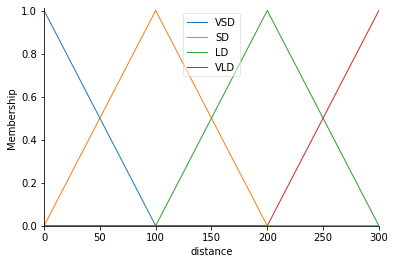

In [4]:
# Triangular Membership Function for distance
distance['VSD'] = fuzz.trimf(distance.universe, [0, 0, 100])
distance['SD'] = fuzz.trimf(distance.universe, [0, 100, 200])
distance['LD'] = fuzz.trimf(distance.universe, [100, 200, 300])
distance['VLD'] = fuzz.trimf(distance.universe, [200, 300, 300])
distance.view()

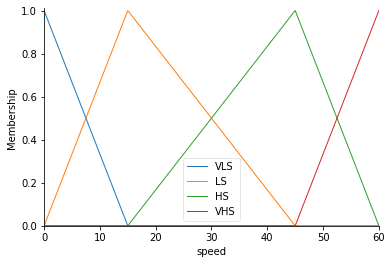

In [5]:
# Triangular Membership Function for Speed
speed['VLS'] = fuzz.trimf(speed.universe, [0, 0, 15])
speed['LS'] = fuzz.trimf(speed.universe, [0, 15, 45])
speed['HS'] = fuzz.trimf(speed.universe, [15, 45, 60])
speed['VHS'] = fuzz.trimf(speed.universe, [45, 60, 60])
speed.view()

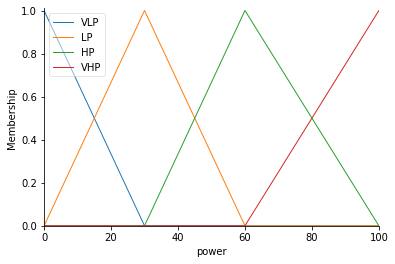

In [6]:
# Triangular Membership Function for Power
power['VLP'] = fuzz.trimf(power.universe, [0, 0, 30])
power['LP'] = fuzz.trimf(power.universe, [0, 30, 60])
power['HP'] = fuzz.trimf(power.universe, [30, 60, 100])
power['VHP'] = fuzz.trimf(power.universe, [60, 100, 100])
power.view()

# Rule Base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbdfcb4ff10>)

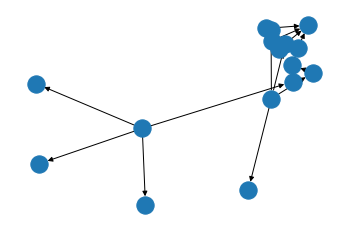

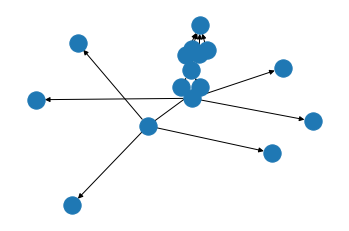

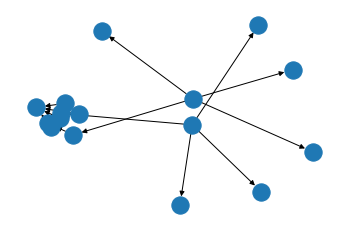

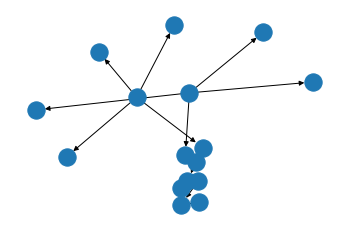

In [7]:
rule1 = ctrl.Rule(distance['VSD'] & speed['VLS'], power['HP'])
rule2 = ctrl.Rule(distance['VSD'] & speed['LS'], power['HP'])
rule3 = ctrl.Rule(distance['VSD'] & speed['HS'], power['VHP'])
rule4 = ctrl.Rule(distance['VSD'] & speed['VHS'], power['VHP'])
rule5 = ctrl.Rule(distance['SD'] & speed['VLS'], power['LP'])
rule6 = ctrl.Rule(distance['SD'] & speed['LS'], power['LP'])
rule7 = ctrl.Rule(distance['SD'] & speed['HS'], power['HP'])
rule8 = ctrl.Rule(distance['SD'] & speed['VHS'], power['VHP'])
rule9 = ctrl.Rule(distance['LD'] & speed['VLS'], power['VLP'])
rule10 = ctrl.Rule(distance['LD'] & speed['LS'], power['LP'])
rule11 = ctrl.Rule(distance['LD'] & speed['HS'], power['LP'])
rule12 = ctrl.Rule(distance['LD'] & speed['VHS'], power['HP'])
rule13 = ctrl.Rule(distance['VLD'] & speed['VLS'], power['VLP'])
rule14 = ctrl.Rule(distance['VLD'] & speed['LS'], power['VLP'])
rule15= ctrl.Rule(distance['VLD'] & speed['HS'], power['LP'])
rule16= ctrl.Rule(distance['VLD'] & speed['VHS'], power['LP'])
rule16.view()
rule12.view()
rule8.view()
rule4.view()


# Control System Creation and Simulation

In [8]:
train_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
train = ctrl.ControlSystemSimulation(train_ctrl)

# Rule Evaluation

In [9]:
train.input['distance'] = 210
train.input['speed'] = 79
train.compute()

59.62948207171314


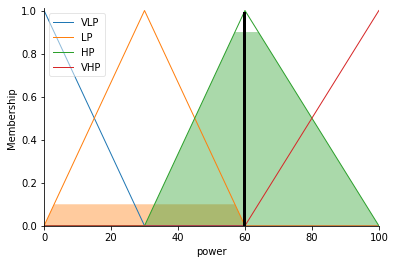

In [10]:
print(train.output['power'])
power.view(sim=train)


In [13]:
train.input['distance'] = 110
train.input['speed'] = 99
train.compute()

81.23486506199855


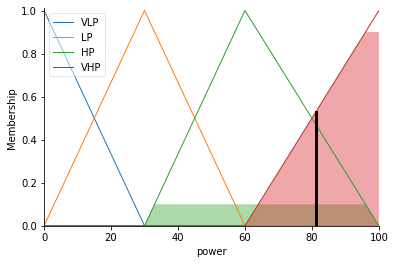

In [14]:
print(train.output['power'])
power.view(sim=train)


Conclusion:- The fuzzy controller has been implemented for train brake problem and evaluated the rules for two examples